In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-uci/heart.csv


# Import Libraries 

In [2]:
# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.figure_factory as ff
import plotly.express as px

# Read Data

In [3]:
df = pd.read_csv("../input/heart-disease-uci/heart.csv")

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Data Info

In [5]:
df.shape

(303, 14)

In [6]:
print("Number of rows in data :", df.shape[0])
print("Number of columns in data :", df.shape[1])

Number of rows in data : 303
Number of columns in data : 14


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### Renaming columns to meaningful names

In [10]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
              'serum_cholesterol', 'fasting_blood_sugar', 'rest_ecg',
              'max_heart_rate','exercise_angina', 'st_depression', 'st_slope',
              'num_major_vessels', 'thalassemia', 'target']

In [11]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**We see that the data is already encoded**

In [12]:
df.dtypes

age                         int64
sex                         int64
chest_pain_type             int64
resting_blood_pressure      int64
serum_cholesterol           int64
fasting_blood_sugar         int64
rest_ecg                    int64
max_heart_rate              int64
exercise_angina             int64
st_depression             float64
st_slope                    int64
num_major_vessels           int64
thalassemia                 int64
target                      int64
dtype: object

In [13]:
df.isnull().sum()

age                       0
sex                       0
chest_pain_type           0
resting_blood_pressure    0
serum_cholesterol         0
fasting_blood_sugar       0
rest_ecg                  0
max_heart_rate            0
exercise_angina           0
st_depression             0
st_slope                  0
num_major_vessels         0
thalassemia               0
target                    0
dtype: int64

**We see from that the data is clean**

In [14]:
# copy data before convert it
df_copy = df.copy()

In [15]:
for column in df.columns:
    if len(df[column].unique())<=5:
        print(f"{column} has {len(df[column].unique())} classes.")

sex has 2 classes.
chest_pain_type has 4 classes.
fasting_blood_sugar has 2 classes.
rest_ecg has 3 classes.
exercise_angina has 2 classes.
st_slope has 3 classes.
num_major_vessels has 5 classes.
thalassemia has 4 classes.
target has 2 classes.


### Convert data so that it is easily to do visulaization on it

In [16]:
df.sex = df.sex.map({0:'female', 1:'male'})

df.chest_pain_type = df.chest_pain_type.map({1:'angina pectoris', 2:'atypical angina', 3:'non-anginal pain', 4:'SMI', 0:'absent'})

df.fasting_blood_sugar = df.fasting_blood_sugar.map({0:'lower than 120mg/ml', 1:'greater than 120mg/ml'})

df.exercise_angina = df.exercise_angina.map({0:'no', 1:'yes'})

df.st_slope = df.st_slope.map({1:'upsloping', 2:'horizontal', 3:'downsloping', 0:'absent'})

df.thalassemia = df.thalassemia.map({1:'normal', 2:'fixed defect', 3:'reversable defect', 0:'absent'})

df.target = df.target.map({0:'No Heart Disease', 1:'Heart Disease'})

In [17]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,non-anginal pain,145,233,greater than 120mg/ml,0,150,no,2.3,absent,0,normal,Heart Disease
1,37,male,atypical angina,130,250,lower than 120mg/ml,1,187,no,3.5,absent,0,fixed defect,Heart Disease
2,41,female,angina pectoris,130,204,lower than 120mg/ml,0,172,no,1.4,horizontal,0,fixed defect,Heart Disease
3,56,male,angina pectoris,120,236,lower than 120mg/ml,1,178,no,0.8,horizontal,0,fixed defect,Heart Disease
4,57,female,absent,120,354,lower than 120mg/ml,1,163,yes,0.6,horizontal,0,fixed defect,Heart Disease


In [18]:
df.target.value_counts()

Heart Disease       165
No Heart Disease    138
Name: target, dtype: int64

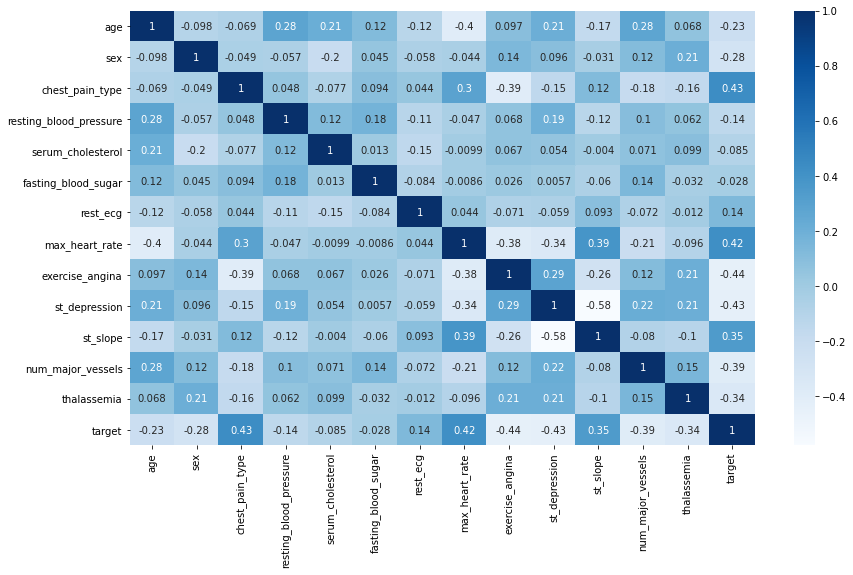

In [19]:
# Drawing a correlation Plot
'''
seaborn.heatmap(data, vmin=None, vmax=None, cmap=None,
                center=None, robust=False, annot=None, fmt='.2g',
                annot_kws=None, linewidths=0, linecolor='white',
                cbar=True, cbar_kws=None, cbar_ax=None, square=False,
                xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)
'''
fig=plt.figure(figsize=(14,8))
sns.heatmap(df_copy.corr(), annot= True, cmap='Blues')

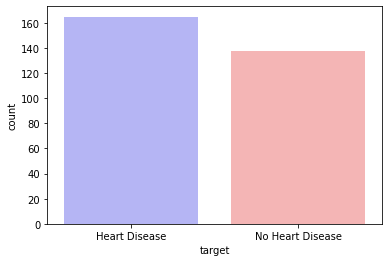

In [20]:
# countplot for target
'''
'seaborn.countplot(x=None, y=None, hue=None, data=None,
                   order=None, hue_order=None, orient=None,
                   color=None, palette=None, saturation=0.75,
                   dodge=True, ax=None, **kwargs)
'''
sns.countplot(x = "target", data = df, palette = "bwr")
plt.show()

**We see that the data is almost palance**

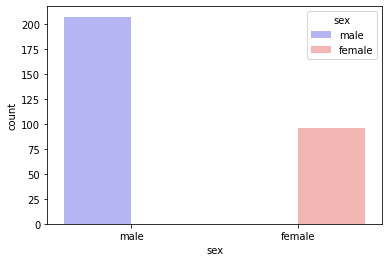

In [21]:
# Count of male and female patients

sns.countplot('sex', hue="sex", data=df, palette="bwr")

## Age distribution 

In [22]:
'''
create_distplot(hist_data, group_labels, bin_size=1.0,
                curve_type='kde', colors=None, rug_text=None,
                histnorm='probability density', show_hist=True,
                show_curve=True, show_rug=True)
'''
hist_col = [df['age']]
group_lbl = ['age']

fig = ff.create_distplot(hist_col, group_lbl, bin_size = 10, show_rug=False)

fig.update_layout(width=700, title_text='Age Distribution')
fig.show()

In [23]:
print(f"Minimum Age : {min(df.age)} years")
print(f"Maximum Age : {max(df.age)} years")

Minimum Age : 29 years
Maximum Age : 77 years


**Age look normal distributed**
 
  - As we know age range from 29 to 77
  - now we will divide age to 3 groups
    - young people --> from 29 to 40
    - mid people   --> from 40 to 55
    - old people   --> from 55 to 77

In [24]:
young_people = df[(df['age'] >= 29) & (df['age'] < 40)]
mid_people = df[(df['age'] > 40) & (df['age'] < 55)]
old_people = df[(df['age'] > 55)]


print("Number of Young Patients : {}".format(len(young_people)))
print("Number of Middle Aged Patients: {}".format(len(mid_people)))
print("Number of Old Aged Patients : {}".format(len(old_people)))

Number of Young Patients : 16
Number of Middle Aged Patients: 125
Number of Old Aged Patients : 151


**From numbers, we see that:-**
   - Their only 16 paople with heart disease, as heart problems are rare in young adults
   - Their are almost close numbers in mid and old people  

### Plotting pie chart for age ranges of people

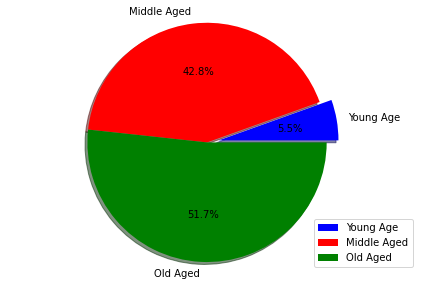

In [25]:
lbls = ['Young Age','Middle Aged','Old Aged']

values = [
      len(young_people), 
      len(mid_people),
      len(old_people)
]

colors = ['blue','red','green']

explode = (0.1, 0, 0)  

plt.pie(values, explode=explode, labels=lbls, colors = colors, autopct='%1.1f%%', shadow=True)
#matplotlib.pyplot.legend(*args, **kwargs)
plt.legend(['Young Age','Middle Aged','Old Aged'], loc = 4 )
plt.axis('equal')
#matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)
plt.tight_layout()
plt.show()

### plot Age and Target based on sex

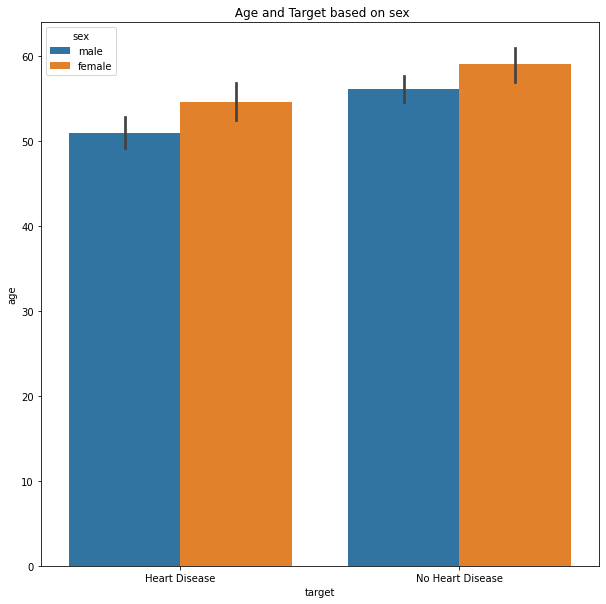

In [26]:
plt.figure(figsize=(10,10))
sns.barplot(x = df['target'], y = df['age'], hue = "sex", data = df)
plt.title(' Age and Target based on sex')
plt.show()

**We can see that:-**
  - the people with fheart problem and peoplewithout heart problem almost similiar ages.
  - and there are almost close number of male and female patientswith heart problems.

In [27]:
# Box plot for target and age based on sex

fig = px.box(df, x = "target", y = "age", points = "all", color = 'sex')
fig.update_layout(title_text = 'BoxPlot of Age and Target')
fig.show()

**We see that:-**

  - The median of ages of people without heart problem is slightly higher than people with heart problems. 
  - he median of ages of female people in two situations is higher than male people. 

Text(0.5, 1.0, 'Chest Pain Types grouped by Targets')

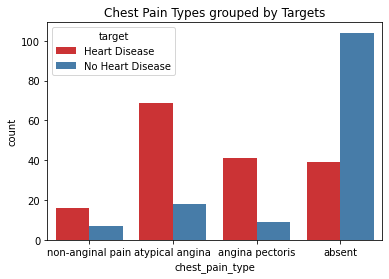

In [28]:
# Counts of Chest pain type among Heart Patients and Non-Heart Patients
'''
countplot(x=None, y=None, hue=None, data=None, order=None,
         hue_order=None, orient=None, color=None, palette=None,
         saturation=0.75, dodge=True, ax=None, **kwargs)
'''
sns.countplot(x = "chest_pain_type", hue = "target", data = df, palette = "Set1")
plt.title("Chest Pain Types grouped by Targets")

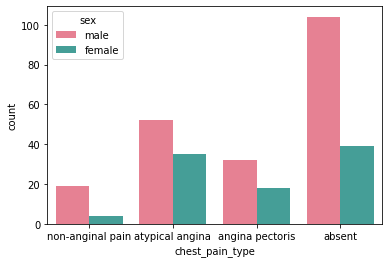

In [29]:
# Counts of Chest pain type among male and female patients

sns.countplot(x = "chest_pain_type", hue = "sex", data = df, palette = "husl")

## Resting Blood Pressure

In [30]:
# The distribution of Resting Blood Pressure

hist_data = [df['resting_blood_pressure']]
group_lbls = ['resting_blood_pressure'] 

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, group_lbls, bin_size=10, show_rug=False)

# Add title
fig.update_layout(width = 700, title_text = 'Resting Blood Pressure Distribution')
fig.show()

**We see that the distribution of resting blood pressure is close to normal distribution.**

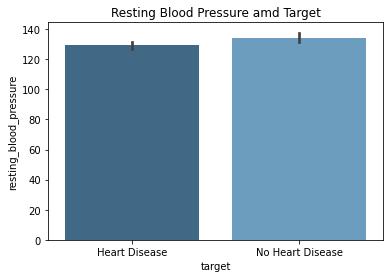

In [31]:
# Plot of Resting Blood Pressure with Target

sns.barplot(x="target", y='resting_blood_pressure',data = df, palette = "Blues_d")
plt.title('Resting Blood Pressure amd Target')
plt.show()

**We see that the resting blood pressure of both Heart people and Non-heart people is close to each other.**

In [32]:
# Boxplot of Resting Blood Pressure with Target

fig = px.box(df, x="target", y="resting_blood_pressure", points="all", color='sex')
fig.update_layout(title_text='BoxPlot of Resting Blood Pressure amd Target')
fig.show()

**We See that:-**
  - Median Resting Blood Pressure with Heart problem - Male (130) and Female (130)
  - Median Resting Blood Pressure without Heart problem - Male (130) and Female (140)

## Serum Cholesterol

In [33]:

hist_data = [df['serum_cholesterol']]
group_lbls = ['serum_cholesterol'] 

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, group_lbls, bin_size = 10, show_rug = False)

# Add title
fig.update_layout(width=700, title_text='Serum Cholesterol Distribution')
fig.show()

**We see that the distribution of resting blood pressure is close to normal distribution.**

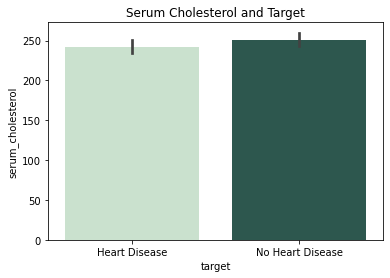

In [34]:
# Plot of Resting Blood Pressure with Target

sns.barplot(x = "target", y = 'serum_cholesterol', data = df, palette="ch:2.5,-.2,dark=.3")
plt.title('Serum Cholesterol and Target')
plt.show()

**The resting blood pressure of both Heart people and Non-heart people is close to each other.**

In [35]:
# Boxplot of Resting Blood Pressure with Target

fig = px.box(df, x = "target", y = "serum_cholesterol", points = "all", color = 'sex')
fig.update_layout(title_text='BoxPlot of Serum Cholesterol and Target')
fig.show()

**We see that:-**
   - Median Serum Cholesterol with Heart Disease - Male (228) and Female (249)
   - Median Serum Cholesterol without Heart Disease - Male (247.5) and Female (265.5)

## Fasting Blood Sugar

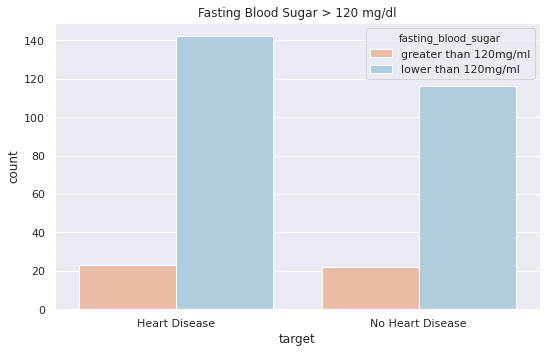

In [36]:
# Counts of Heart problem and No Heart problem Patients with fasting blood sugar above 120 mg/dl
# and lower than 120 mg/dl

sns.set(rc={'figure.figsize':(8.7,5.27)})

sns.countplot(hue='fasting_blood_sugar',x ='target',data = df, palette="RdBu")
plt.title('Fasting Blood Sugar > 120 mg/dl')
plt.show()

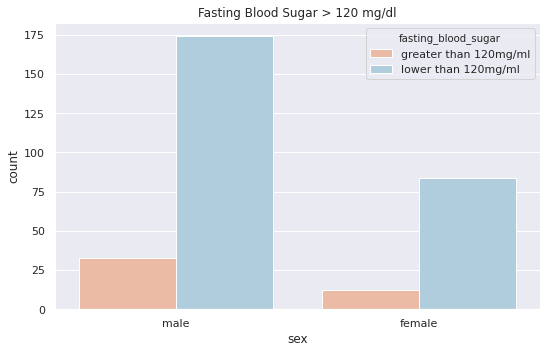

In [37]:
# Counts of Male and Female people with fasting blood sugar above 120 mg/dl
# and lower than 120 mg/dl

sns.countplot(hue='fasting_blood_sugar',x ='sex',data = df, palette="RdBu")
plt.title('Fasting Blood Sugar > 120 mg/dl')
plt.show()

**We see that there are more Male people with lower and greater than 120 mg/dl fasting sugar as compared to Female people.**

## Maximum Heart Rate

In [38]:

hist_data = [df['max_heart_rate']]
group_lbls = ['max_heart_rate'] 

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, group_lbls, bin_size=10, show_rug=False, colors = ['#708002'])

# Add title
fig.update_layout(width=700, title_text='Maximum Blood Pressure Distribution')
fig.show()


**We see that The distribution of Maximum Heart Rate is close to normal distribution.**

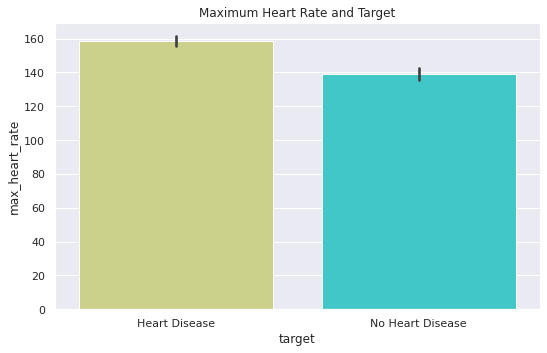

In [39]:
# Maximum heart rate and target 

sns.barplot(x="target", y='max_heart_rate',data = df, palette="rainbow_r")
plt.title('Maximum Heart Rate and Target')
plt.show()

**We see that the Maximum Heart Rate in Heart Disease people is more than Non-Heart Disease people.**

In [40]:
# Box plot on basis of sex

fig = px.box(df, x="target", y="max_heart_rate", points="all", color='sex')
fig.update_layout(title_text='Maximum Heart Rate and Target')
fig.show()

**We see that:-**
  - Median Maximum Heart Rate with Heart Disease - Male (163) and Female (159)
  - Median Maximum Heart Rate without Heart Disease - Male (141) and Female (145.5)

In [41]:
df.shape

(303, 14)

In [42]:
y = df_copy['target'] 
train_set = df_copy.drop(columns = ['target'])


In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_set, y, test_size=0.20, random_state=42)

In [44]:
from sklearn.feature_selection import SelectKBest, f_classif

X_new = SelectKBest(f_classif, k=8).fit_transform(X_train, y_train)

In [45]:
X_new.shape

(242, 8)

In [46]:
print(X_new)

[[  1.   1. 162. ...   2.   0.   2.]
 [  1.   0. 111. ...   2.   0.   3.]
 [  1.   2. 147. ...   1.   0.   2.]
 ...
 [  1.   3. 131. ...   1.   1.   2.]
 [  1.   0. 144. ...   2.   0.   3.]
 [  0.   1. 179. ...   2.   2.   2.]]


In [47]:
df = pd.DataFrame(X_new, index=X_new[:,0])
df.head()

,0,1,2,3,4,5,6,7
1.0,1.0,1.0,162.0,0.0,0.0,2.0,0.0,2.0
1.0,1.0,0.0,111.0,1.0,0.8,2.0,0.0,3.0
1.0,1.0,2.0,147.0,0.0,3.6,1.0,0.0,2.0
0.0,0.0,1.0,161.0,0.0,1.4,1.0,0.0,2.0
1.0,1.0,0.0,160.0,1.0,1.4,2.0,2.0,3.0
